In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, losses
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Layer
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
class Encoder(Layer):
    def __init__(self, filters=16, kernel_size=3, strides=2, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
    
    def build(self, input_shape):
        self.conv2d = Conv2D(self.filters, self.kernel_size, activation='relu', padding='same', strides=self.strides)
    
    def call(self, inputs):
        x = self.conv2d(inputs)
        return x

In [6]:
class Decoder(Layer):
    def __init__(self, filters=16, kernel_size=3, strides=2, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
    
    def build(self, input_shape):
        self.conv2dtranspose = Conv2DTranspose(self.filters, kernel_size=self.kernel_size, strides=self.strides, activation='relu', padding='same')
        self.conv2d = Conv2D(3, kernel_size=self.kernel_size, activation='sigmoid', padding='same')
    
    def call(self, inputs):
        x = self.conv2dtranspose(inputs)
        x = self.conv2d(x)
        return x

In [7]:
class AutoEncoder(Model):
    def __init__(self, encoding_dim=1024, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = Encoder(filters=16, kernel_size=3, strides=2, name="encoder")
        self.decoder = Decoder(filters=16, kernel_size=3, strides=2, name="decoder")
    
    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x

In [8]:
autoencoder = AutoEncoder(name="autoencoder")

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0010 - val_loss: 8.9934e-04
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 8.2630e-04 - val_loss: 7.3632e-04
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 7.0443e-04 - val_loss: 6.4666e-04
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 6.0145e-04 - val_loss: 5.4277e-04
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 5.2201e-04 - val_loss: 4.7282e-04
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 4.5942e-04 - val_loss: 5.0036e-04
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 4.1282e-04 - val_loss: 3.7930e-04
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 3.8071e-04 - val_loss: 3.7008e-04
Epoc

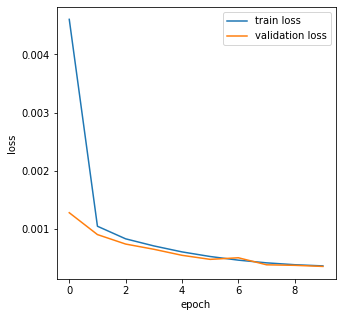

In [11]:
fig = plt.figure(figsize=(5, 5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

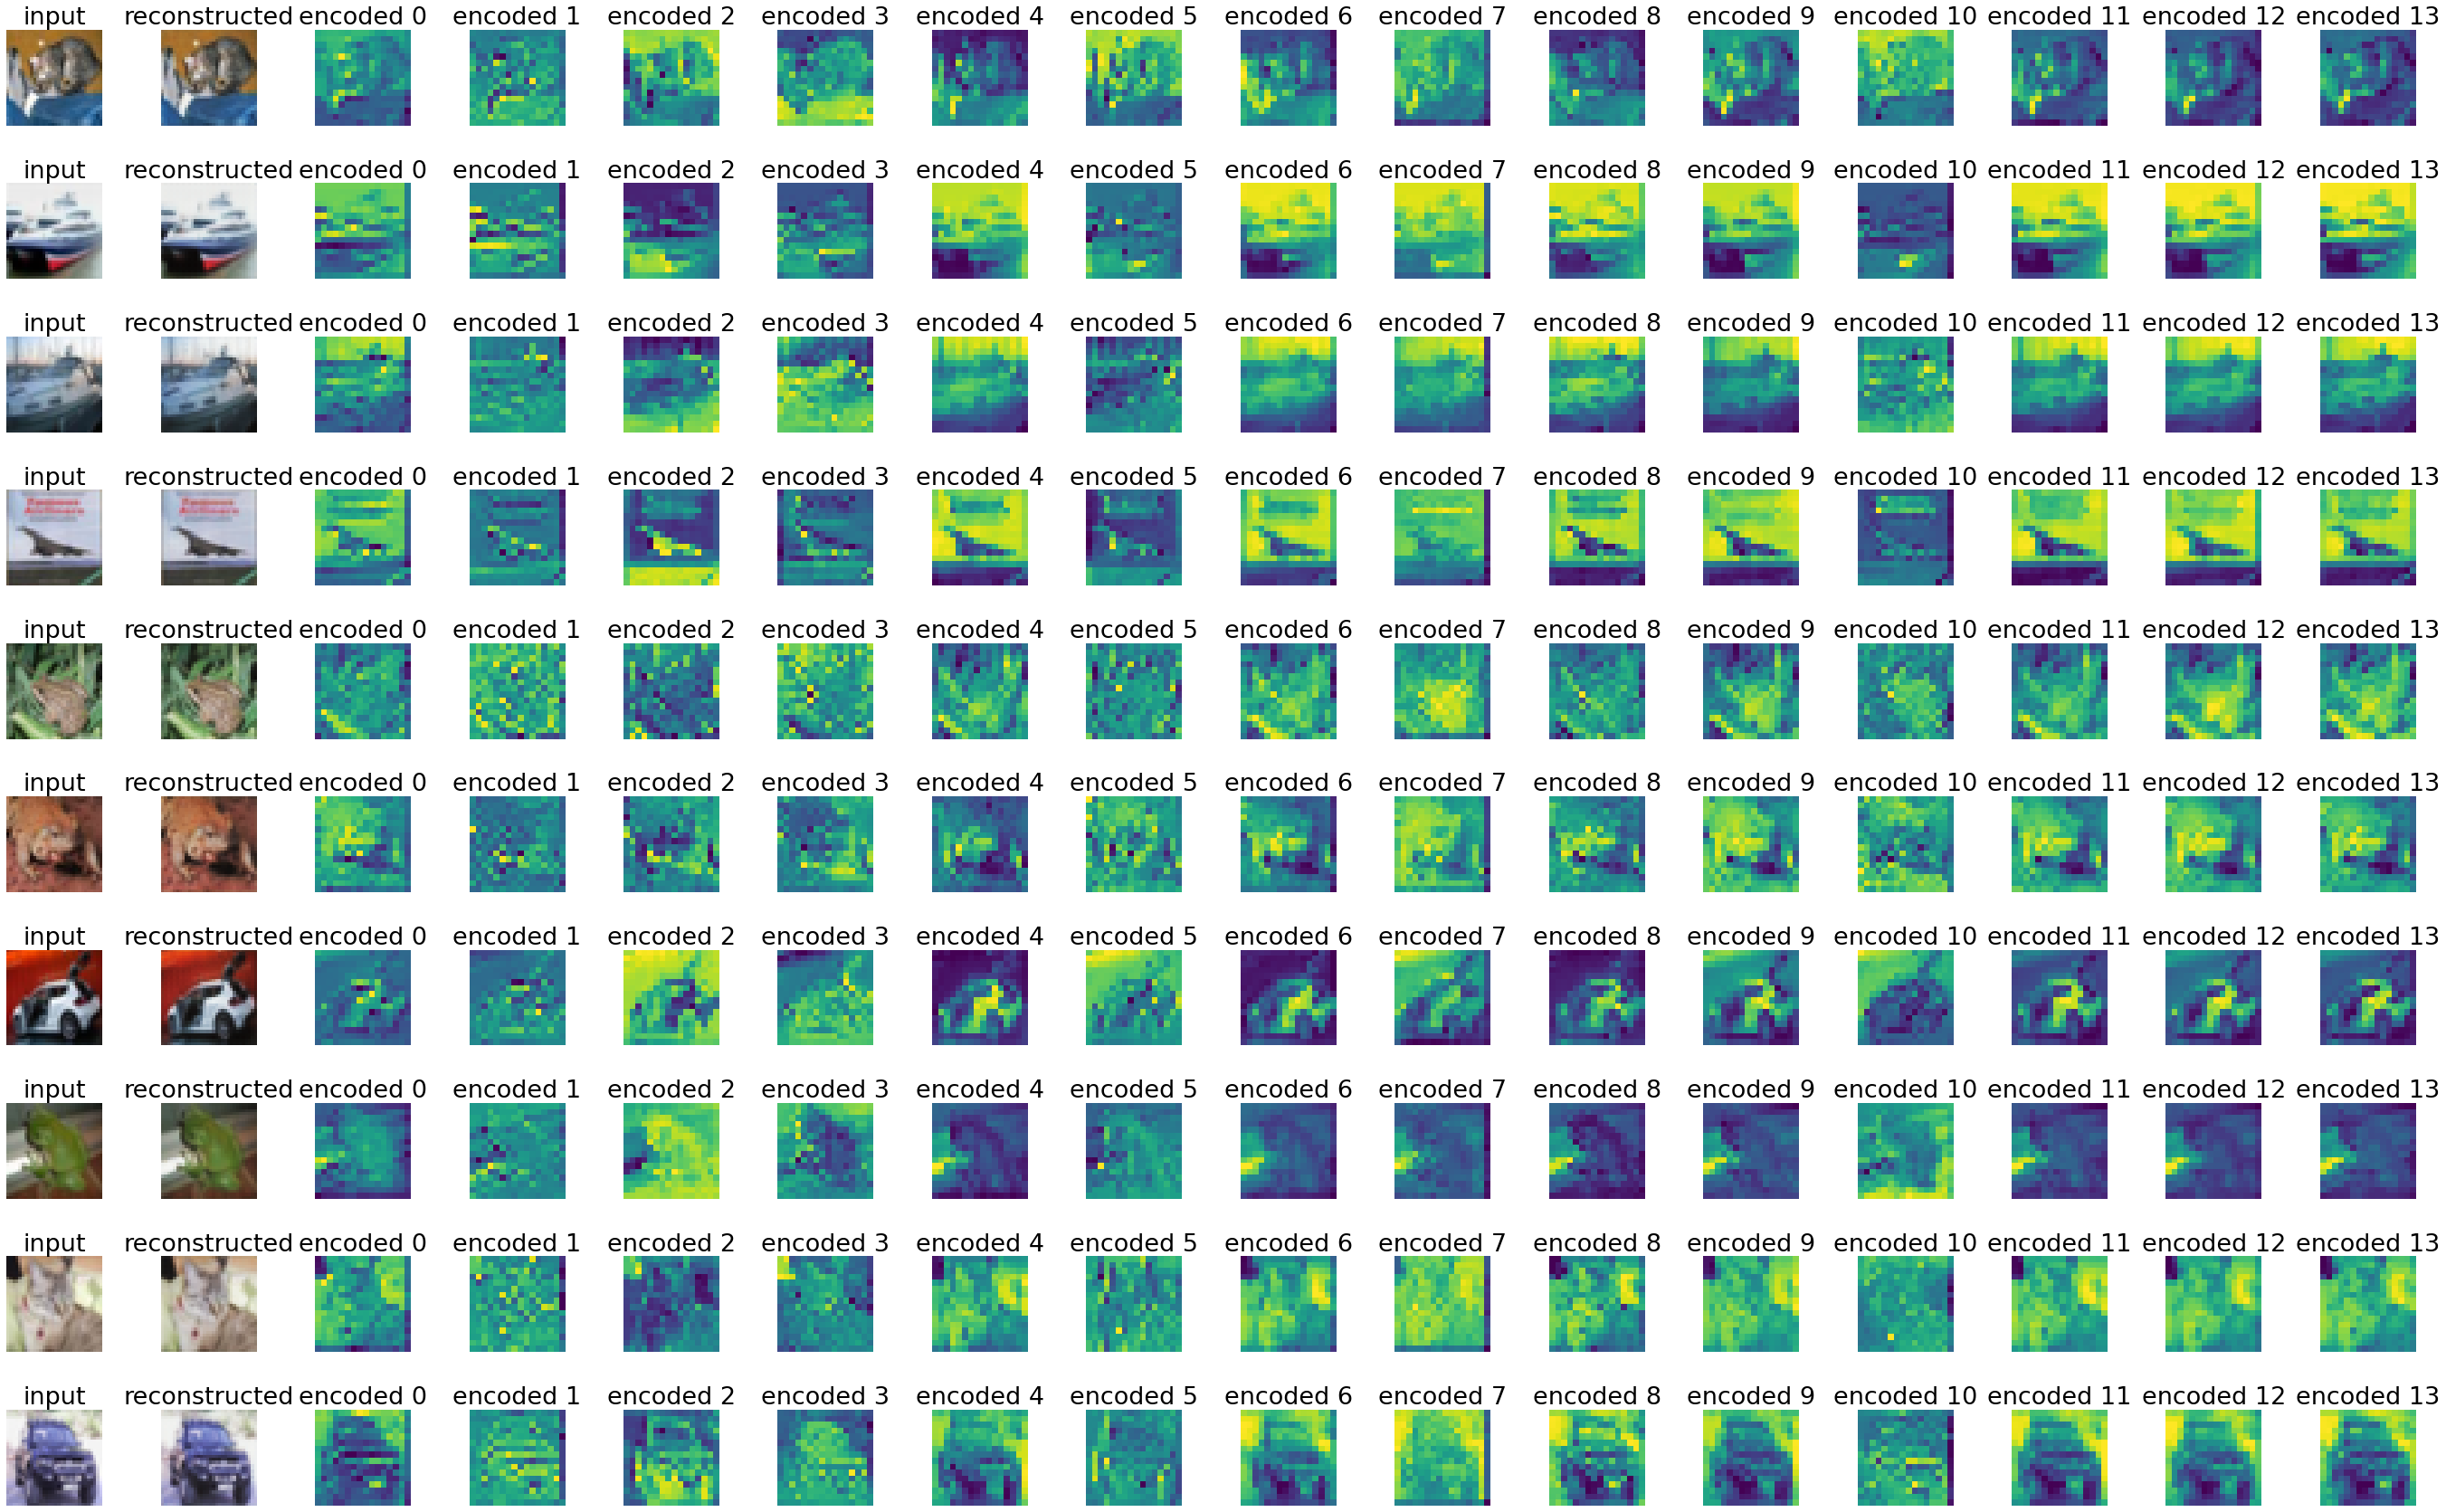

In [12]:
fig = plt.figure(figsize=(3 * 16, 3 * 10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(10):
    x = tf.expand_dims(x_test[i], 0)
    encoded = autoencoder.get_layer("encoder")(x)
    predicted = autoencoder.predict(x)
    ax1 = fig.add_subplot(10, 16, 16 * i + 1)
    ax1.axis('off')
    ax1.set_title('input', fontsize=27)
    ax1.imshow(x_test[i])
    ax2 = fig.add_subplot(10, 16, 16 * i + 2)
    ax2.axis('off')
    ax2.set_title('reconstructed', fontsize=27)
    ax2.imshow(predicted[0])
    for j in range(14):
        ax = fig.add_subplot(10, 16, 16 * i + j + 3)
        ax.axis('off')
        ax.set_title(f'encoded {j}', fontsize=27)
        ax.imshow(encoded[0, :, :, j])
plt.show()

In [13]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            multiple                  448       
_________________________________________________________________
decoder (Decoder)            multiple                  2755      
Total params: 3,203
Trainable params: 3,203
Non-trainable params: 0
_________________________________________________________________
